In [1]:
import json
from pprint import pprint
import pandas as pd
import os
import re
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Получаем список файлов в папки
ds = pd.read_json('sber0705.json')

In [56]:
with open(f'data/short.json', 'w', encoding='utf-8') as file:
        ds[:10].to_json(file, force_ascii=False)

In [3]:
# ds.drop(['product_name_lower_sorted', 'product_name_lower', ], axis=1, inplace=True)
ds.name_store.value_counts()

auchan            31895
globus            24548
okey              20418
metro             13544
lenta             13160
victoria           4655
verniy_fd          3084
dixy               2626
magnit_express     2285
fixpricefd         1582
Name: name_store, dtype: int64

In [4]:
# PATH = 'G:/JN/sarawan/sber.json'
data = ds

In [5]:
ds.columns

Index(['_id', 'name_store', 'main_category_name', 'main_category_img_url',
       'category_name', 'category_img_url', 'category_permalink',
       'product_name', 'product_img_link', 'product_instamart_price',
       'product_original_unit_price', 'product_price', 'product_human_volume',
       'product_items_per_pack', 'product_price_type', 'product_stock',
       'product_stock_rate', 'product_max_stock_rate', 'product_discounted',
       'product_discount', 'product_unit_price', 'product_description',
       'product_description_original', 'product_properties'],
      dtype='object')

In [6]:
ds[ds['name_store'] == 'victoria'].head()

,_id,name_store,main_category_name,main_category_img_url,category_name,category_img_url,category_permalink,product_name,product_img_link,product_instamart_price,...,product_price_type,product_stock,product_stock_rate,product_max_stock_rate,product_discounted,product_discount,product_unit_price,product_description,product_description_original,product_properties
8638,{'$oid': '62753c361f2789db4558f4d1'},victoria,"Канцелярия, книги",{'url': 'https://sbermarket.ru/spree/taxons/58...,Бизнес-литература,{'url': 'https://sbermarket.ru/spree/taxons/67...,knighi-i-zhurnaly/biznies-litieratura,Журнал Мир новостей Откровения звезд,[{'url': 'https://sbermarket.ru/spree/products...,83.0,...,per_item,15,0,0,False,0.0,83.0,"Ежемесячная газета ""Откровения звезд"" рассказы...","Ежемесячная газета ""Откровения звезд"" рассказы...","{'product_ingredients': {}, 'product_nutrition..."
25727,{'$oid': '62754b931f2789db45593792'},victoria,Автотовары,{'url': 'https://sbermarket.ru/spree/taxons/65...,Уход за стеклами,{'url': 'https://sbermarket.ru/spree/taxons/65...,avtotovary/ukhod-za-avto/ukhod-za-stieklami,Жидкость Auto Express стеклоомывателя незамерз...,[{'url': 'https://sbermarket.ru/spree/products...,330.0,...,per_item,80,0,0,False,0.0,330.0,,,{'product_ingredients': {'Состав': 'Анионные П...
25728,{'$oid': '62754b931f2789db45593793'},victoria,Автотовары,{'url': 'https://sbermarket.ru/spree/taxons/65...,Уход за стеклами,{'url': 'https://sbermarket.ru/spree/taxons/65...,avtotovary/ukhod-za-avto/ukhod-za-stieklami,Жидкость Champion стеклоомывающая незамерзающа...,[{'url': 'https://sbermarket.ru/spree/products...,330.0,...,per_item,34,0,0,False,0.0,330.0,,,{'product_ingredients': {'Состав': 'Анионные П...
110770,{'$oid': '62759a521f2789db455a83c5'},victoria,"Одежда, обувь, аксессуары",{'url': 'https://sbermarket.ru/spree/taxons/76...,"Кремы, губки, щетки",{'url': 'https://sbermarket.ru/spree/taxons/58...,dlia-doma-i-dachi/ukhod-za-obuviu-i-odiezhdoi/...,Воск для обуви Штрих для гладкой кожи бесцветн...,[{'url': 'https://sbermarket.ru/static/product...,172.0,...,per_item,30,0,0,False,0.0,172.0,Новая формула восковой композиции на основе на...,Новая формула восковой композиции на основе на...,"{'product_ingredients': {}, 'product_nutrition..."
110771,{'$oid': '62759a531f2789db455a83c6'},victoria,"Канцелярия, книги",{'url': 'https://sbermarket.ru/spree/taxons/58...,"Журналы, газеты",{'url': 'https://sbermarket.ru/spree/taxons/77...,knighi-i-zhurnaly/zhurnaly-ghaziety,Газета Аргументы и Факты,[{'url': 'https://sbermarket.ru/spree/products...,61.0,...,per_item,10,0,0,False,0.0,61.0,"Вся информация в одной газете: независимо, взв...","Вся информация в одной газете: независимо, взв...","{'product_ingredients': {}, 'product_nutrition..."


In [47]:
def give_me_dataset(data):
    
    # regex for all nums and len(word)>3 -> new column product_group_name
    df = data.copy()
    
    # Приведение цены товара к цене за 1 кг

#     splitted_weight = pd.DataFrame(map(lambda x: x.split(' '), 
#                                 df[df['product_price_type'] == 'per_kilo']['product_human_volume']))
#     splitted_weight = splitted_weight.set_index(df[df['product_price_type'] == 'per_kilo']['product_human_volume'].index)
#     splitted_weight[0] = splitted_weight[0].str.replace(',', '.')

#     for item in splitted_weight.index:
#         if splitted_weight[1][item] == 'кг':
#             df['product_price'][item] = round(df['product_price'][item] 
#                                                                    * 1/float(splitted_weight[0][item]), 2)
#             df['product_human_volume'][item] = '1 кг'
            
#         elif splitted_weight[1][item] == 'г':
#             df['product_price'][item] = round(df['product_price'][item] 
#                                                                    * 1000/float(splitted_weight[0][item]), 2)
#             df['product_human_volume'][item] = '1 кг'


    # Приведение цены товара к цене за 1 кг

    df.loc[(df['product_price_type'] == 'per_kilo'), 'product_price'] = df['product_unit_price']
    df.loc[(df['product_price_type'] == 'per_kilo'), 'product_human_volume'] = '1 кг'

    # Создание колонки для группировки продуктов
    re1 = r"\d+" # nums
    re2 = '\w{3,30}' # words
    list_of_names = [sorted(re.compile("(%s|%s)" % (re1, re2)).findall(str(i.lower()))) for i in df.product_name]
    list_of_weight = [re.findall(re1, i) for i in df.product_human_volume]
    small_name_col = []
    for num, w_or_d in enumerate(list_of_names):
#         if len(w_or_d) <= 3 & (re.search(re1, str(w_or_d)) is None):
        if (re.search(re1, str(w_or_d)) is None):
            weight = list_of_weight[num]
            small_name  = str(weight[0]) + ' ' + ' '.join(w_or_d)
        else:
            small_name = ' '.join(w_or_d)
        small_name_col.append(small_name)
    
    df.insert(loc=0, column='product_group_name', value=small_name_col)    
        
    # delete duplicates in each shop and make clear_dataset   
    magnit_express_df = df[df['name_store'] == 'magnit_express']
    magnit_express_df.drop_duplicates(subset='product_group_name', inplace=True)
    magnit_express_df.loc[magnit_express_df['name_store'] == 'magnit_express', 'name_store'] = 'Магнит'
    
    lenta_df = df[df['name_store'] == 'lenta']
    lenta_df.drop_duplicates(subset='product_group_name', inplace=True)
    lenta_df.loc[lenta_df['name_store'] == 'lenta', 'name_store'] = 'Лента'
    
    fixprice_df = df[df['name_store'] == 'fixpricefd']
    fixprice_df.drop_duplicates(subset='product_group_name', inplace=True)
    fixprice_df.loc[fixprice_df['name_store'] == 'fixpricefd', 'name_store'] = 'Фикспрайс'
    
    metro_df = df[df['name_store'] == 'metro']
    metro_df.drop_duplicates(subset='product_group_name', inplace=True)
    metro_df.loc[metro_df['name_store'] == 'metro', 'name_store'] = 'Метро'
    
    victoria_df = df[df['name_store'] == 'victoria']
    victoria_df.drop_duplicates(subset='product_group_name', inplace=True)
    victoria_df.loc[victoria_df['name_store'] == 'victoria', 'name_store'] = 'Виктория'
    
    auchan_df = df[df['name_store'] == 'auchan']
    auchan_df.drop_duplicates(subset='product_group_name', inplace=True)
    auchan_df.loc[auchan_df['name_store'] == 'auchan', 'name_store'] = 'Ашан'
    
    okey_df = df[df['name_store'] == 'okey']
    okey_df.drop_duplicates(subset='product_group_name', inplace=True)
    okey_df.loc[okey_df['name_store'] == 'okey', 'name_store'] = 'Окей'
    
    globus_df = df[df['name_store'] == 'globus']
    globus_df.drop_duplicates(subset='product_group_name', inplace=True)
    globus_df.loc[globus_df['name_store'] == 'globus', 'name_store'] = 'Глобус'
    
    
    globus_df = df[df['name_store'] == 'dixy']
    globus_df.drop_duplicates(subset='product_group_name', inplace=True)
    globus_df.loc[globus_df['name_store'] == 'dixy', 'name_store'] = 'Дикси'
    
    
    globus_df = df[df['name_store'] == 'verniy_fd']
    globus_df.drop_duplicates(subset='product_group_name', inplace=True)
    globus_df.loc[globus_df['name_store'] == 'verniy_fd', 'name_store'] = 'Верный'
    
    clear_dataset = pd.concat([magnit_express_df,lenta_df,metro_df,victoria_df,auchan_df,okey_df,globus_df, fixprice_df])
    
    # delete inedible goods
    clear_dataset.drop(clear_dataset[clear_dataset.product_human_volume == '50 м'].index, inplace=True)
    
#     clear_dataset.drop(clear_dataset[clear_dataset.product_human_volume.str.contains('см')|
#                                      clear_dataset.product_human_volume.str.contains('лист')|
#                                      clear_dataset.product_human_volume.str.contains('Вт')|
#                                      clear_dataset.product_human_volume.str.contains('Гб')|
#                                      clear_dataset.product_human_volume.str.contains('пак')|
#                                      clear_dataset.product_human_volume.str.contains('уп')].index, inplace=True)
    
    clear_dataset.drop(clear_dataset[clear_dataset.main_category_name.str.contains('Электрон')|
                                     clear_dataset.main_category_name.str.contains('емонт')|
#                                      clear_dataset.main_category_name.str.contains('Канцелярия')|
                                     clear_dataset.main_category_name.str.contains('гигиена')|
                                     clear_dataset.main_category_name.str.contains('Товары для дома')|
                                     clear_dataset.main_category_name.str.contains('обувь')|
                                     clear_dataset.main_category_name.str.contains('химия')|
                                     clear_dataset.main_category_name.str.contains('Авто')|
                                     clear_dataset.main_category_name.str.contains('Дача')|
                                     clear_dataset.main_category_name.str.contains('екстиль')|
                                     clear_dataset.main_category_name.str.contains('книги')|
                                     clear_dataset.main_category_name.str.contains('порт')|
                                     clear_dataset.main_category_name.str.contains('-10% со СберПрайм')|
                                     clear_dataset.main_category_name.str.contains('Спецпредложения')|
                                     clear_dataset.main_category_name.str.contains('Рекомендац')|
                                     clear_dataset.main_category_name.str.contains('Алкоголь')].index, inplace=True)
    
    clear_dataset.drop(clear_dataset[clear_dataset.product_name.str.contains('play')|
                                     clear_dataset.product_name.str.contains('Play')|
                                     clear_dataset.product_name.str.contains('игурка')|
                                     clear_dataset.product_name.str.contains('пластилин')|
                                     clear_dataset.product_name.str.contains('песок')|
                                     clear_dataset.product_name.str.contains('онструктор')|
                                     clear_dataset.product_name.str.contains('Пенал')|
                                     clear_dataset.product_name.str.contains('Краски')|
                                     clear_dataset.product_name.str.contains('Салфетки')|
                                     clear_dataset.product_name.str.contains('Ванночка')].index, inplace=True)
    
    clear_dataset.drop(clear_dataset[clear_dataset.category_name.str.contains('увениры')|
                                     clear_dataset.category_name.str.contains('пятновыводители')|
                                     clear_dataset.category_name.str.contains('пароварки')|
                                     clear_dataset.category_name.str.contains('оловные уборы')|
                                     clear_dataset.category_name.str.contains('езодорант')|
                                     clear_dataset.category_name.str.contains('ирлянд')|
                                     clear_dataset.category_name.str.contains('ксессуар')|
                                     clear_dataset.category_name.str.contains('дом')|
                                     clear_dataset.category_name.str.contains('игиена')|
                                     clear_dataset.category_name.str.contains('Авто')|
                                     clear_dataset.category_name.str.contains('игры')|
                                     clear_dataset.category_name.str.contains('музыка')|
                                     clear_dataset.category_name.str.contains('уход')|
                                     clear_dataset.category_name.str.contains('Зубн')|
#                                      clear_dataset.category_name.str.contains('Игруш')|
                                     clear_dataset.category_name.str.contains('Купание')|
                                     clear_dataset.category_name.str.contains('переноск')|
                                     clear_dataset.category_name.str.contains('антисептик')|
                                     clear_dataset.category_name.str.contains('Наполнител')|
                                     clear_dataset.category_name.str.contains('Носки')|
                                     clear_dataset.category_name.str.contains('посуда')|
                                     clear_dataset.category_name.str.contains('рабочего')|
                                     clear_dataset.category_name.str.contains('Ортопед')|
                                     clear_dataset.category_name.str.contains('Пазлы')|
                                     clear_dataset.category_name.str.contains('упаковка')|
                                     clear_dataset.category_name.str.contains('Презервативы')|
                                     clear_dataset.category_name.str.contains('Присыпка')|
                                     clear_dataset.category_name.str.contains('Прогулка')|
                                     clear_dataset.category_name.str.contains('Пустышки')|
                                     clear_dataset.category_name.str.contains('декор')|
#                                      clear_dataset.category_name.str.contains('салфетки')|
#                                      clear_dataset.category_name.str.contains('Шампуни')|
                                     clear_dataset.category_name.str.contains('Школьные')|
                                     clear_dataset.category_name.str.contains('Шарики')|
                                     clear_dataset.category_name.str.contains('игруш')|
                                     clear_dataset.category_name.str.contains('Подгузники')].index, inplace=True)
    
    
    volume_list = clear_dataset['product_human_volume'].to_list().copy()
    volume_list = [i.replace(',', '.') for i in volume_list]
    volume_list = [i.split() for i in volume_list]
    new_list = []
    re3 = r"\d+[ ]\w{1,2}"
    re4 = r"\d+"
    for num, i in enumerate(volume_list):
        if len(i) == 4:
            volume_list[num] = str(float(i[0]) * float(i[3])) + ' ' + i[1]
        if len(i) == 2 and i[1] == 'шт':
            try:
                volume_list[num] = re.compile("(%s|%s)" % (re3, re4)).findall(str(new_df.product_name.to_list()[num]))[0].split()
            except:
                volume_list[num] = '1 кг'
            
    for num, i in enumerate(volume_list):
        if len(i) == 2:
            if i[1] == 'г' or i[1] == 'мл':
                new_list.append(round(float(i[0]) / 1000, 2))
            elif i[1] == 'мг':
                new_list.append(round(float(i[0]) / 1000000, 2))
            elif i[1] == 'л':
                new_list.append(round(float(i[0]), 2))
            elif i[1] == 'шт':
                new_list.append(1)
            elif i[1] == 'кг':
                new_list.append(round(float(i[0])))
            else:
                new_list.append(1)
        else:
            new_list.append(1)
    
    for num, i in enumerate(new_list):
        if float(i) > 30:
            new_list[num] = float(i) / 1000
            
    discount = [round((1 - (i / j)) * 100) for i, j in zip(clear_dataset.product_unit_price.to_list(), clear_dataset.product_original_unit_price.to_list())]
    
    clear_dataset.drop(['product_discount'], axis=1, inplace=True)
    clear_dataset.insert(loc=20, column='product_discount', value=discount)   
    clear_dataset.insert(loc=0, column='total_weight_kg', value=new_list)
    
    with open(f'data/sber_1.json', 'w', encoding='utf-8') as file:
        clear_dataset[:10000].to_json(file, force_ascii=False)
    with open(f'data/sber_2.json', 'w', encoding='utf-8') as file:
        clear_dataset[10000:20000].to_json(file, force_ascii=False)
    with open(f'data/sber_3.json', 'w', encoding='utf-8') as file:
        clear_dataset[20000:30000].to_json(file, force_ascii=False)
    with open(f'data/sber_4.json', 'w', encoding='utf-8') as file:
        clear_dataset[30000:40000].to_json(file, force_ascii=False)
    with open(f'data/sber_5.json', 'w', encoding='utf-8') as file:
        clear_dataset[40000:50000].to_json(file, force_ascii=False)
    with open(f'data/sber_6.json', 'w', encoding='utf-8') as file:
        clear_dataset[50000:60000].to_json(file, force_ascii=False)
    with open(f'data/sber_7.json', 'w', encoding='utf-8') as file:
        clear_dataset[60000:].to_json(file, force_ascii=False)
    
    
    return clear_dataset

In [48]:
%%time
new_df = give_me_dataset(data)
new_df.head()

<ipython-input-47-2e3450cb88a3>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magnit_express_df.drop_duplicates(subset='product_group_name', inplace=True)
<ipython-input-47-2e3450cb88a3>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lenta_df.drop_duplicates(subset='product_group_name', inplace=True)
<ipython-input-47-2e3450cb88a3>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixprice_df.drop_duplicates(subset='product_grou

Wall time: 25.8 s


,total_weight_kg,product_group_name,_id,name_store,main_category_name,main_category_img_url,category_name,category_img_url,category_permalink,product_name,...,product_price_type,product_stock,product_stock_rate,product_max_stock_rate,product_discounted,product_discount,product_unit_price,product_description,product_description_original,product_properties
0,0.45,450 короткоплодные огурцы тепличные,{'$oid': '6275346b1f2789db4558d313'},Магнит,"Овощи, фрукты, орехи",{'url': 'https://sbermarket.ru/spree/taxons/41...,Овощи,{'url': 'https://sbermarket.ru/spree/taxons/41...,ovoshchi-frukty-oriekhi/ovoshchi,Огурцы короткоплодные тепличные 450 г,...,per_item,17,0,0,False,0,83.0,,,{'product_ingredients': {'Состав': 'Огурцы кор...
1,0.50,500 редис,{'$oid': '6275346b1f2789db4558d314'},Магнит,"Овощи, фрукты, орехи",{'url': 'https://sbermarket.ru/spree/taxons/41...,Овощи,{'url': 'https://sbermarket.ru/spree/taxons/41...,ovoshchi-frukty-oriekhi/ovoshchi,Редис 500 г,...,per_item,12,0,0,False,0,110.0,,,"{'product_ingredients': {}, 'product_nutrition..."
129,2.00,2 тыква,{'$oid': '627534891f2789db4558d394'},Магнит,"Овощи, фрукты, орехи",{'url': 'https://sbermarket.ru/spree/taxons/41...,Овощи,{'url': 'https://sbermarket.ru/spree/taxons/41...,ovoshchi-frukty-oriekhi/ovoshchi,Тыква ~2 кг,...,per_package,7,0,0,False,0,86.0,,,"{'product_ingredients': {'Состав': 'Тыква.'}, ..."
130,0.20,200 premiere taste помидоры черри,{'$oid': '627534891f2789db4558d395'},Магнит,"Овощи, фрукты, орехи",{'url': 'https://sbermarket.ru/spree/taxons/41...,Овощи,{'url': 'https://sbermarket.ru/spree/taxons/41...,ovoshchi-frukty-oriekhi/ovoshchi,Помидоры Черри Premiere of Taste 200 г,...,per_item,18,0,0,False,0,170.0,,,"{'product_ingredients': {}, 'product_nutrition..."
135,0.60,600 баклажаны тепличные,{'$oid': '6275348c1f2789db4558d39a'},Магнит,"Овощи, фрукты, орехи",{'url': 'https://sbermarket.ru/spree/taxons/41...,Овощи,{'url': 'https://sbermarket.ru/spree/taxons/41...,ovoshchi-frukty-oriekhi/ovoshchi,Баклажаны тепличные 600 г,...,per_item,4,0,0,False,0,210.0,Баклажаны тепличные характеризуются насыщенным...,Баклажаны тепличные характеризуются насыщенным...,"{'product_ingredients': {}, 'product_nutrition..."


In [51]:
# Проверка работы программы
new_df.loc[(new_df['main_category_name'] == 'Овощи, фрукты, орехи') & (new_df['product_price_type'] == 'per_kilo') & (new_df['product_discount'] != 0), ['product_group_name','total_weight_kg', 'product_human_volume', 'product_price', 'product_instamart_price',  'product_original_unit_price', 'product_unit_price', 'product_discount' ]].head(50)

,product_group_name,total_weight_kg,product_human_volume,product_price,product_instamart_price,product_original_unit_price,product_unit_price,product_discount
69800,1 бананы,1.0,1 кг,84.00,130.00,130.00,84.00,35
69881,1 апельсины,1.0,1 кг,94.00,75.00,150.00,94.00,37
69891,1 свекла,1.0,1 кг,60.00,35.00,70.00,60.00,14
84943,1 помидоры,1.0,1 кг,156.00,130.00,260.00,156.00,40
85686,1 огурцы пупырчатые среднеплодные,1.0,1 кг,120.00,55.20,184.00,120.00,35
85694,1 кабачки,1.0,1 кг,124.00,70.00,140.00,124.00,11
85798,1 картофель новый урожай,1.0,1 кг,70.00,50.00,100.00,70.00,30
85814,1 чеснок,1.0,1 кг,350.00,40.00,400.00,350.00,12
115497,1 грейпфруты красные,1.0,1 кг,130.00,90.00,180.00,130.00,28
115523,1 морковь мытая,1.0,1 кг,130.00,70.00,140.00,130.00,7


In [30]:
# new_df.loc[(new_df['product_price_type'] == 'per_kilo'), 'product_price'] = new_df['product_unit_price']
# new_df.loc[(new_df['product_price_type'] == 'per_kilo'), 'product_human_volume'] = '1 кг'

In [50]:
new_df.loc[new_df['main_category_name'] == 'Овощи, фрукты, орехи', ['product_name','total_weight_kg', 'product_human_volume', 'product_price_type', 
                                                'product_price', 'product_instamart_price',  'product_original_unit_price', 'product_unit_price' ]].head(30)

,product_name,total_weight_kg,product_human_volume,product_price_type,product_price,product_instamart_price,product_original_unit_price,product_unit_price
0,Огурцы короткоплодные тепличные 450 г,0.45,450 г,per_item,83.00,83.0,83.00,83.00
1,Редис 500 г,0.50,500 г,per_item,110.00,110.0,110.00,110.00
129,Тыква ~2 кг,2.00,2 кг,per_package,172.00,172.0,86.00,86.00
130,Помидоры Черри Premiere of Taste 200 г,0.20,200 г,per_item,170.00,170.0,170.00,170.00
135,Баклажаны тепличные 600 г,0.60,600 г,per_item,210.00,210.0,210.00,210.00
69800,Бананы,1.00,1 кг,per_kilo,84.00,130.0,130.00,84.00
69881,Апельсины,1.00,1 кг,per_kilo,94.00,75.0,150.00,94.00
69882,Лук зеленый 50 г,0.05,50 г,per_item,45.00,45.0,45.00,45.00
69883,Бананы мини,1.00,1 кг,per_kilo,150.00,150.0,150.00,150.00
69884,Свекла мытая 1 кг,1.00,1 кг,per_item,120.00,120.0,120.00,120.00


In [19]:
new_df.loc[new_df['main_category_name'] == 'Рецепты', ['product_name','total_weight_kg', 'product_human_volume', 'product_price_type', 'product_unit_price', 'product_price', 'product_instamart_price', 'product_discount']].head(30)

,product_name,total_weight_kg,product_human_volume,product_price_type,product_unit_price,product_price,product_instamart_price,product_discount
27,Лимон 2 шт,0.20,200 г,per_item,126.39,126.39,126.39,0
28,Лимоны Россия,0.30,300 г,per_kilo,157.89,47.37,47.37,0
93,Томаты Помидорка в собственном соку 720 г,0.72,720 г,per_item,202.07,202.07,202.07,0
94,Томаты 365 дней в собственном соку 720 мл,0.72,720 г,per_item,126.35,126.35,126.35,0
95,Томаты Лукашинские в собственном соку со сладк...,0.67,670 г,per_item,210.49,210.49,210.49,0
6856,Корица Kotanyi целая 17 г,0.02,17 г,per_item,94.79,94.79,94.79,0
6858,Корица Kotanyi молотая 25 г,0.03,25 г,per_item,73.69,73.69,73.69,0
6859,Kamis Специя Корица молотая пакет 15 г,0.01,15 г,per_item,106.64,106.64,106.64,0
6860,Корица Парфэ декор молотая 35 г,0.04,35 г,per_item,52.69,52.69,52.69,0
6861,"Газированный напиток Schweppes Биттер Лемон 0,9 л",0.90,900 мл,per_item,115.69,115.69,115.69,0


In [52]:
# Группировка по 'product_group_name'
new_df[new_df["product_name"].str.lower().str.contains("бананы")].sort_values(by='total_weight_kg', ascending=False).groupby(['product_group_name']).size().reset_index(name='counts')

,product_group_name,counts
0,1 бананы,6
1,1 бананы коста рика,1
2,1 бананы мини,1
3,1 бананы эквадор,1
4,150 casali банановое конфеты суфле шокобананы,3
5,150 chef metro бананы сушеные,1
6,180 6 gerber бананы каша месяцев молочная муль...,4
7,180 banana republic бананы конфеты шоколаде,1
8,200 banana republic бананы сушеные,1
9,200 foods natur бананы сушеные,1


In [13]:
# Группировка по 'product_name'
new_df[new_df["product_name"].str.lower().str.contains("бананы")].sort_values(by='total_weight_kg', ascending=False).groupby(['product_name']).size().reset_index(name='counts')

,product_name,counts
0,Бананы,6
1,Бананы Коста-Рика,1
2,Бананы Эквадор,1
3,Бананы вяленые NaturFoods 200 г,1
4,Бананы вяленые Naturfoods 200 г,1
5,Бананы мини,1
6,Бананы сушеные Banana Republic 200 г,1
7,Бананы сушеные Metro Chef 150 г,1
8,Бананы сушеные Natur Foods 200 г,1
9,Бананы сушеные Вьетконг 70 г,1


In [14]:
# группировка по 'product_group_name' 
# new_df.groupby(['product_group_name','name_store', ]).first()

In [15]:
# группировка по 'product_group_name' с поиском
# new_df[new_df["product_name"].str.lower().str.contains("бананы")].groupby(['product_group_name', 'name_store', 'total_weight_kg']).first()

In [16]:
ach = new_df[new_df['name_store'] == 'Ашан']

In [17]:
ach[ach["product_name"].str.lower().str.contains("бананы")].sort_values(by='total_weight_kg', ascending=False).groupby(['product_group_name', 'main_category_name']).size().reset_index(name='counts')

,product_group_name,main_category_name,counts
0,1 бананы,Рецепты,1
1,150 casali банановое конфеты суфле шокобананы,Сладости,1
2,180 6 gerber бананы каша месяцев молочная муль...,Детские товары,1
3,200 naturfoods бананы вяленые,"Овощи, фрукты, орехи",1


In [18]:
recepies = new_df[new_df['main_category_name'] == 'Рецепты']
recepies.groupby('product_group_name').first()['product_name']

product_group_name
0 05 1 comfort parmalat безлактозное бзмж молоко ультрапастеризованное    Молоко 0,05% ультрапастеризованное 1 л Parmala...
0 05 1 comfort parmalat безлактозное молоко ультрапастеризованное         Молоко 0,05% ультрапастеризованное 1 л Parmala...
0 05 1 elite valio молоко обезжиренное ультрапастеризованное              Молоко 0,05% обезжиренное ультрапастеризованно...
0 1 130 venn бзмж греческий йогурт обезжиренный                           Йогурт Venn's Греческий обезжиренный 0,1% БЗМЖ...
0 1 2 25 chef metro бзмж молоко сахаром сгущенное                         Сгущенное молоко Metro Chef с сахаром 0,2% БЗМ...
                                                                                                ...                        
950 варено европейский колбаса копченая окраина сервелат                  Колбаса Окраина Сервелат Европейский варено-ко...
950 грудки индейки малое охлажденное пава пава филе                       Филе грудки индейки Пава-Пава малое охл

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48801 entries, 0 to 111145
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_weight_kg               48801 non-null  float64
 1   product_group_name            48801 non-null  object 
 2   _id                           48801 non-null  object 
 3   name_store                    48801 non-null  object 
 4   main_category_name            48801 non-null  object 
 5   main_category_img_url         48801 non-null  object 
 6   category_name                 48801 non-null  object 
 7   category_img_url              48801 non-null  object 
 8   category_permalink            48801 non-null  object 
 9   product_name                  48801 non-null  object 
 10  product_img_link              48801 non-null  object 
 11  product_instamart_price       48801 non-null  float64
 12  product_original_unit_price   48801 non-null  float64
 13  

In [20]:
# Просмотр категорий в разных магазинах
shop = np.unique(new_df['name_store'].values)
for name in shop:
    print('Магазин - ', name, '\n\n', new_df.loc[new_df['name_store'] == name, 'main_category_name'].value_counts(), '\n\n')

Магазин -  Ашан 

 Рецепты                         3659
Сладости                        1776
Детские товары                  1553
Товары для животных             1441
Бакалея                          950
Вода, соки, напитки              810
Чай и кофе                       569
Колбасы, сосиски, деликатесы     521
Соусы, специи, масло             510
Замороженные продукты            475
Консервы, соленья                431
Мелочи возле кассы               404
Рыба, морепродукты, икра         372
Хлеб, выпечка                    365
Чипсы, снеки                     264
Мясо, птица                      246
Овощи, фрукты, орехи             167
Name: main_category_name, dtype: int64 


Магазин -  Верный 

 Сладости                        433
Вода, соки, напитки             297
Детские товары                  243
Бакалея                         243
Соусы, специи, масло            176
Чай, кофе                       145
Консервы, соленья               131
Колбасы, сосиски, деликатесы    128
О

In [53]:
#Очистка данных
new_df['product_group_name'] = new_df['product_group_name'].str.replace(r'chef metro', '')

In [54]:
new_df['product_group_name'] = new_df['product_group_name'].apply(lambda x: x.replace('chef metro', '').replace('коста рика', '').replace('эквадор', ''))

In [55]:
new_df[new_df["product_name"].str.lower().str.contains("бананы")].groupby(['product_group_name', 'name_store', 'total_weight_kg']).first()

_id  \
product_group_name                                 name_store total_weight_kg                                         
1 бананы                                           Ашан       1.00             {'$oid': '627567701f2789db4559aefc'}   
                                                   Верный     1.00             {'$oid': '627571891f2789db4559da13'}   
                                                   Виктория   1.00             {'$oid': '62759eac1f2789db455a9661'}   
                                                   Лента      1.00             {'$oid': '62753ab31f2789db4558efe3'}   
                                                   Магнит     1.00             {'$oid': '6275749c1f2789db4559e3bb'}   
                                                   Метро      1.00             {'$oid': '627558fd1f2789db45597285'}   
1 бананы                                           Метро      1.00             {'$oid': '627558e41f2789db455971fe'}   
                                                   Окей       1.00             {'$oid': '62754a8a1f2789db4559338a'}   
1 бананы мини                                      Магнит     1.00             {'$oid': '627574b01f2789db4559e40e'}   
150  бананы сушеные                                Метро      0.15             {'$oid': '62757bac1f2789db4559fff2'}   
150 casali банановое конфеты суфле шокобананы      Ашан       0.15             {'$oid': '62757e721f2789db455a0a52'}   
                                                   Метро      0.15             {'$oid': '627578c41f2789db4559f41c'}   
                                                   Окей       0.15             {'$oid': '62756c981f2789db4559c44a'}   
180 6 gerber бананы каша месяцев молочная мульт... Ашан       0.18             {'$oid': '6275625b1f2789db45599bfa'}   
                                                   Лента      0.18             {'$oid': '627538631f2789db4558e50b'}   
                                                   Метро      0.18             {'$oid': '6275563d1f2789db45596646'}   
                                                   Окей       0.18             {'$oid': '627549371f2789db45592d47'}   
180 banana republic бананы конфеты шоколаде        Верный     0.18             {'$oid': '62756e951f2789db4559ccfe'}   
200 banana republic бананы сушеные                 Метро      0.20             {'$oid': '62757ba71f2789db4559ffe0'}   
200 foods natur бананы сушеные                     Лента      0.20             {'$oid': '627541321f2789db45590785'}   
200 naturfoods бананы вяленые                      Ашан       0.20             {'$oid': '627583251f2789db455a1d93'}   
                                                   Окей       0.20             {'$oid': '62754b2c1f2789db45593624'}   
70 бананы вьетконг сушеные                         Фикспрайс  0.07             {'$oid': '62759a541f2789db455a83cd'}   
90 banana republic бананы глазури конфеты сушен... Фикспрайс  0.09             {'$oid': '62759a591f2789db455a83e5'}   

                                                                                 main_category_name  \
product_group_name                                 name_store total_weight_kg                         
1 бананы                                           Ашан       1.00                          Рецепты   
                                                   Верный     1.00             Овощи, фрукты, орехи   
                                                   Виктория   1.00             Овощи, фрукты, орехи   
                                                   Лента      1.00                          Рецепты   
                                                   Магнит     1.00             Овощи, фрукты, орехи   
                                                   Метро      1.00                          Рецепты   
1 бананы                                           Метро      1.00                          Рецепты   
                                                   Окей       1.00                        

### Фильтрация выбоки

In [24]:
stores = ['Ашан','Лента', 'Окей', 'Метро', 'Магнит']
def filter_data(df, stores):
    # Cоздадим выборку продуктов  из магазинов stores
    filt_data = df.loc[df['name_store'].isin(stores), ['product_group_name','product_name', 'name_store', 'product_price']]
    filt_data_all = df.loc[:, ['product_group_name', 'product_name', 'name_store', 'product_price']]
    filt_data['counts'] = filt_data.groupby(['product_group_name'])['product_price'].transform('count') #Подсчет количества идентичных продкутов, трансформирует ненулевую колонку
    my_flt_df = filt_data.loc[filt_data['counts'] == len(stores)].reset_index()
    return my_flt_df, filt_data_all


my_flt_df, filt_data_all = filter_data(new_df, stores)
my_flt_df.shape
# gr1 = test_data.loc[test_data['name_store'].isin(stores)].groupby(['product_group_name'])                        #.apply(lambda x: x.isin(stores))
# gr1.head()
# # data_test.groupby(['product_group_name', 'name_store', 'total_weight_kg']).first()\
# test.first()
# test_data

(850, 6)

### Создание корзины продуктов

In [25]:
indx = np.random.randint(0, len(my_flt_df.product_group_name.unique()), 20) #Порядковый номер в строке, не индекс в исходном датасете
list_of_prod = my_flt_df.product_group_name.unique()[indx]

# list_of_prod = my_flt_df.iloc[indx]['product_name'].values
# list_of_indx = my_flt_df.iloc[indx]['index'].values
# my_flt_df.iloc[1]['index']

print(list_of_prod)

prod_basket = my_flt_df.loc[my_flt_df['product_group_name'].isin(list_of_prod)]
prod_basket_all = filt_data_all.loc[filt_data_all['product_group_name'].isin(list_of_prod)]
stores_all = filt_data_all.loc[filt_data_all['product_group_name'].isin(list_of_prod), 'name_store']
stores_all = np.unique(stores_all.values)
prod_basket.shape


['2 дар квас русский традиционный'
 '180 арахисовой вафельной душа конфеты крошке начинкой просторы родные россия шоколадные щедрая'
 '225 lay картофельные лук рифленые сметана чипсы'
 '100 2 ceylon golden greenfield пакетиках чай черный'
 '0 9 schweppes биттер газированный лемон напиток'
 '0 5 fanta апельсин газированный напиток'
 '1 cola pepsi газированный напиток'
 '225 lay картофельные лук рифленые сметана чипсы'
 '20 joy kinder игрушкой кондитерское яйцо'
 '2 25 ceylon golden greenfield пакетиках чай черный'
 '100 2 ceylon golden greenfield пакетиках чай черный'
 '40 6 nestle ассорти быстров каша клубника моментальная овсяная персик черника'
 '500 кетчуп махеевъ томатный'
 '0 75 borjomi вода газированная минеральная природная пэт'
 '700 коллекция пельмени сибирская фирменные'
 '450 makfa витки изделия макаронные'
 '0 75 borjomi вода газированная минеральная природная пэт'
 '300 агуша напиток сокосодержащий яблочный'
 '116 глазури комильфо конфеты помадные фисташка шоколадной'
 '13

(85, 6)

### Группировка и подсчет цены корзины продуктов в каждом магазине

In [26]:
basket_price = prod_basket.groupby(['name_store']).agg({'product_price': 'sum'})
basket_price_all = prod_basket_all.groupby(['name_store']).agg({'product_price': 'sum'})
print(basket_price)

            product_price
name_store               
Ашан              3040.16
Лента             3233.84
Магнит            2906.00
Метро             3013.70
Окей              2490.85


### Подсчет минимальной корзины

In [27]:
basket_price_min = prod_basket.groupby(['product_group_name']).agg({'product_price': 'min'}).assign(total_price = lambda x: x['product_price'].sum())
print(basket_price_min) 
# Подсчет по всем магазинам по минимальной цене
basket_price_min_all = prod_basket_all.groupby(['product_group_name']).agg({'product_price': 'min'}).assign(total_price = lambda x: x['product_price'].sum())

# Значения цен по магазинам по алфавиту и в конце - Сарафан
price_stores =  np.append(basket_price.product_price.values, basket_price_min['product_price'].sum())
price_stores_all =  np.append(price_stores, basket_price_min_all['product_price'].sum())
# price_stores_all = np.append(basket_price_all.product_price.values, basket_price_min_all['product_price'].sum())


store_names = np.append(sorted(stores), 'Сарафан')
store_names_all = np.append(store_names, 'Sarafan')
# store_names_all = np.append(sorted(stores_all), 'Сарафан_все')
print(f'\nМинимальная цена за корзину по всем магазинам:  {round(price_stores_all[-1], 2)} рублей')
print(store_names_all)
price_stores_all

                                                    product_price  total_price
product_group_name                                                            
0 5 fanta апельсин газированный напиток                     74.99      2143.32
0 75 borjomi вода газированная минеральная прир...          99.99      2143.32
0 9 schweppes биттер газированный лемон напиток            115.69      2143.32
1 cola pepsi газированный напиток                           70.00      2143.32
100 2 ceylon golden greenfield пакетиках чай че...         399.00      2143.32
116 глазури комильфо конфеты помадные фисташка ...         204.99      2143.32
13 kotanyi греческая для приправа салата                    31.00      2143.32
180 арахисовой вафельной душа конфеты крошке на...         109.90      2143.32
2 25 ceylon golden greenfield пакетиках чай черный         129.99      2143.32
2 дар квас русский традиционный                             85.90      2143.32
20 joy kinder игрушкой кондитерское яйцо            

array([3040.16, 3233.84, 2906.  , 3013.7 , 2490.85, 2143.32, 2120.43])

### Подсчет статистики

In [115]:
def create_basket(my_flt_df, filt_data_all): 
    indx = np.random.randint(0, len(my_flt_df.product_group_name.unique()), 20) #Порядковый номер в строке, не индекс в исходном датасете
    list_of_prod = my_flt_df.product_group_name.unique()[indx]

# list_of_prod = my_flt_df.iloc[indx]['product_name'].values
# list_of_indx = my_flt_df.iloc[indx]['index'].values
# my_flt_df.iloc[1]['index']

    # print(list_of_prod)

    prod_basket = my_flt_df.loc[my_flt_df['product_group_name'].isin(list_of_prod)]
    prod_basket_all = filt_data_all.loc[filt_data_all['product_group_name'].isin(list_of_prod)]
    stores_all = filt_data_all.loc[filt_data_all['product_group_name'].isin(list_of_prod), 'name_store']
    stores_all = np.unique(stores_all.values)
    return prod_basket, prod_basket_all, stores_all

In [116]:
def basket_price(prod_basket, prod_basket_all):
    basket_price = prod_basket.groupby(['name_store']).agg({'product_price': 'sum'})
    basket_price_all = prod_basket_all.groupby(['name_store']).agg({'product_price': 'sum'})
    
    # Подсчет минимальной цены корзины по выбранным магазинам
    basket_price_min = prod_basket.groupby(['product_group_name']).agg({'product_price': 'min'}).assign(total_price = lambda x: x['product_price'].sum())
    # Подсчет минимальной цены корзины по всем магазинам
    basket_price_min_all = prod_basket_all.groupby(['product_group_name']).agg({'product_price': 'min'}).assign(total_price = lambda x: x['product_price'].sum())
    # Значения цен по магазинам по алфавиту и в конце - Сарафан
    price_stores_all =  np.append(basket_price.product_price.values, basket_price_min_all['product_price'].sum())
    store_names = np.append(sorted(stores), 'Sarawan')
    return price_stores_all, store_names


In [117]:
stores = ['Ашан','Лента', 'Магнит', 'Метро', 'Окей']
n = 1000
price_stores_stat = []
mean_ecomony = []
for i in range(n):
    my_flt_df, filt_data_all = filter_data(new_df, stores)
    prod_basket, prod_basket_all, stores_all = create_basket(my_flt_df, filt_data_all)
    price_stores_all, store_names_all = basket_price(prod_basket, prod_basket_all)
    mean_ecomony.append((np.mean(price_stores_all[:-1]) - price_stores_all[-1]) / price_stores_all[-1])
    price_stores_stat.append(price_stores_all)

In [118]:
# Средняя цена в каждом магазине
price = np.array(price_stores_stat).T
mean_price = np.round(np.mean(price, axis=1))
mean_price

array([2888., 2981., 2774., 3007., 2574., 2203.])

In [119]:
# Процент экономии
percent  = np.round(100 * (mean_price - mean_price[-1]) / mean_price[-1])
percent

array([31., 35., 26., 36., 17.,  0.])

In [120]:
round(np.mean(mean_ecomony) * 100 , 2) 

29.48

## построение диаграммы

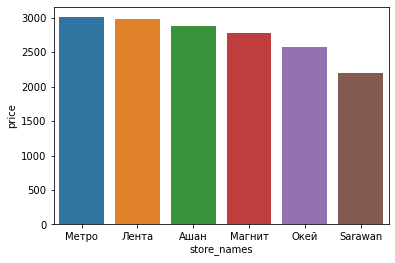

In [145]:
# x = []
# for i in range(1, len(mean_price) - 1):
#     xx = 'магазин_' + str(i)
#     x.append(xx)
x = store_names_all
y = mean_price

diagram = pd.DataFrame(np.column_stack([x, y.astype(int)]), 
                               columns=['store_names', 'price'])
diagram['price'] = y.astype(int)

ax = sns.barplot(x = 'store_names' ,
                 y = "price" , data = diagram,
                 order = diagram.sort_values( 'price' ,ascending = False ).store_names)

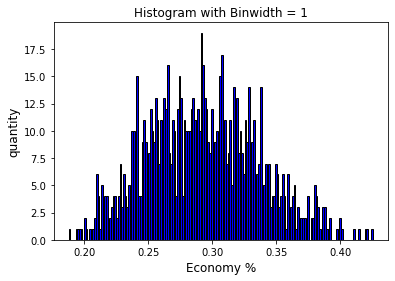

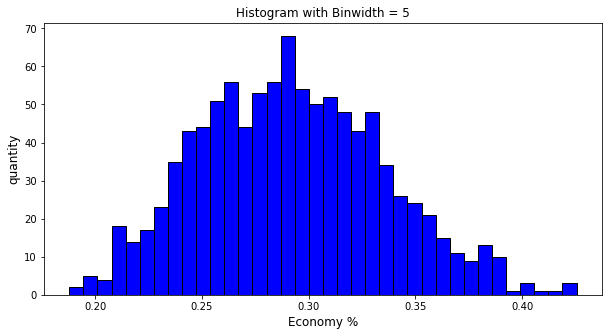

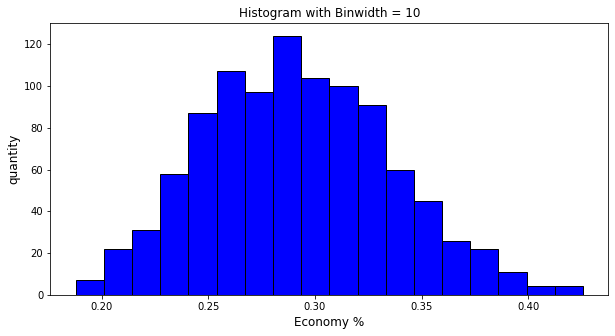

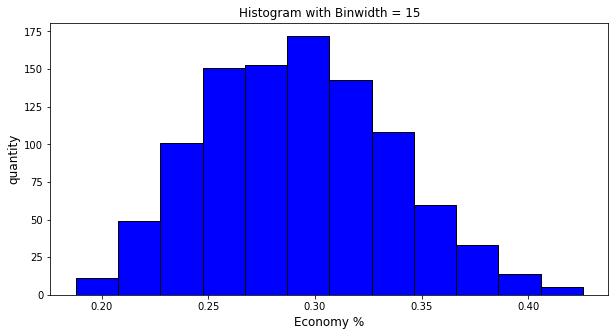

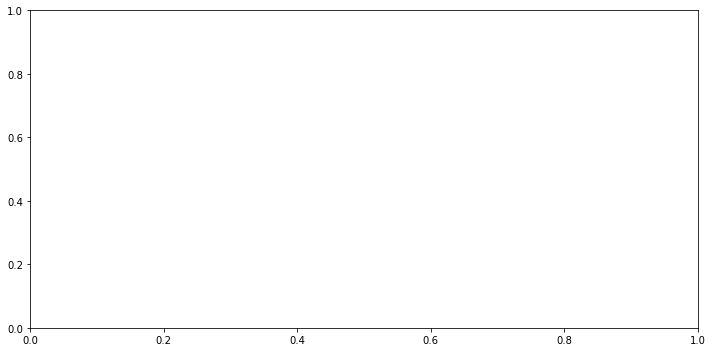

In [207]:
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    
    ax = plt.subplot()    #(2, 2, i + 1)
    fig = plt.subplots(figsize=(10, 5))
    # Draw the plot
    ax.hist(mean_ecomony, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 12)
    ax.set_xlabel('Economy %', size = 12)
    ax.set_ylabel('quantity', size= 12)

plt.tight_layout()
plt.show()